# Econ Problem Set #5

***
Tom Curran

July 17, 2018

OSM BootCamp 2018
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, truncnorm, gamma
import scipy.optimize as opt
import scipy.stats as sts
%matplotlib inline

1. Health claim amounts and the GB family of distributions. For this
problem, you will use 10,619 health claims amounts from a fictitious sample of
households. These data are in a single column of the text file clms.txt in the
WK5 StrEst folder. Health claim amounts are reported in U.S. dollars. For this
exercise, you will need to use the generalized beta family of distributions shown
in the figure in Section 7 of your MLE Jupyter notebook.

a. Calculate and report the mean, median, maximum, minimum, and standard
deviation of monthly health expenditures for these data. Plot two
histograms of the data in which the y-axis gives the percent of observations
in the particular bin of health expenditures and the x-axis gives the value
of monthly health expenditures. Use percentage histograms in which the
height of each bar is the percent of observations in that bin (see instructions
in Jupyter notebook PythonVisualize.ipynb in Section 1.2). In
the first histogram, use 1,000 bins to plot the frequency of all the data. In
the second histogram, use 100 bins to plot the frequency of only monthly
health expenditures less-than-or-equal-to $800 (xi ≤ 800). Adjust the frequencies
of this second histogram to account for the observations that you
have not displayed (xi > 800). That is, the heights of the histogram bars
in the second histogram should not sum to 1 because you are only displaying
a fraction of the data. Comparing the two histograms, why might you
prefer the second one?

In [2]:
claims = pd.np.loadtxt("/Users/thomascurran/Documents/GitRepos/BootCamp2018/Econ/Wk5_StrEst/data/clms.txt")
print(pd.DataFrame(claims).describe())

                   0
count   10619.000000
mean      720.277975
std      3972.850824
min         0.010000
25%        74.450000
50%       172.210000
75%       451.535000
max    227967.250000


Text(0.5,0,'Claim Amount')

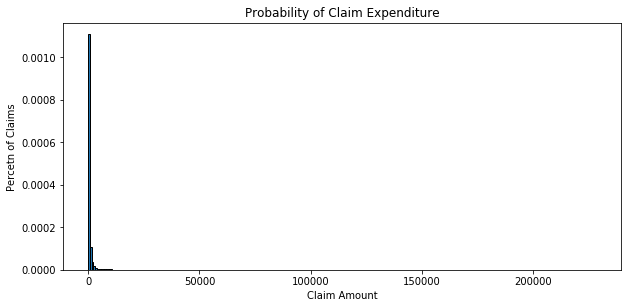

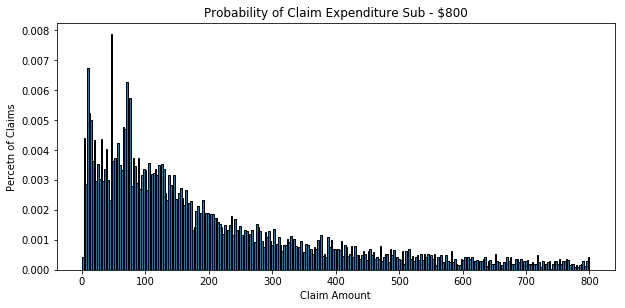

In [3]:
plt.figure(figsize = (10,10))
plt.subplot(211)
count, bins, ignored = plt.hist(claims, bins = 300,density = True, edgecolor = 'k' )
plt.title("Probability of Claim Expenditure")
plt.ylabel("Percetn of Claims")
plt.xlabel("Claim Amount")

plt.figure(figsize = (10,10))
plt.subplot(212)
count, bins, ignored = plt.hist(claims[claims <=800], bins = 300,density = True, edgecolor = 'k' )
plt.title("Probability of Claim Expenditure Sub - $800")
plt.ylabel("Percetn of Claims")
plt.xlabel("Claim Amount")

The graph on the left has all the expenditures, including the maximum which is a large outlier where as the graph on the right contains a better idea of the distribution of most people.

---

b.Using MLE, fit the gamma $GA(x;\alpha, \beta)$ distribution to the individual observation data. Use $\beta_0 = Var(x)/E(x)$a nd $\alpha_0 =\frac{E(x)}{ \beta_0}$ as your initial
guess. 

Report your estimated values for $\hat\alpha$ and $\hat\beta$, as well as the value of the maximized log likelihood function $ln \mathcal{L}(\hat\theta)$. 

Plot the second histogram from part (a) overlayed with a line representing the implied histogram from your estimated gamma (GA) distribution.

In [14]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_truncnorm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [15]:

# Define log likelihood function for the normal distribution# Defin 
def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [16]:

# Define function that generates values of a normal pdf# Defin 
def trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

In [36]:
x800 = claims[claims<= 800]
mu_init = 150
sigma_init = 180
params_init = np.array([mu_init, sigma_init])
mle_args = (claims, 0, 850)
results = opt.minimize(crit, params_init, args = (mle_args))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [37]:
results

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([150., 180.])